## Titanic - Machine Learning from Disaster

### By Datathon 2023, Group 1:

> **Asiat Suleiman**

> **Maryam Oyeyiola**

> **AbdulWasiu Olatunji**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
print('Done')

Done


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(train.Age.mean())
print(train.Age.median())
print(train.Age.mode())

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


In [6]:
train.Age = train.Age.fillna(train.Age.mean())

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train = train.drop(['Cabin'], axis=1)

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

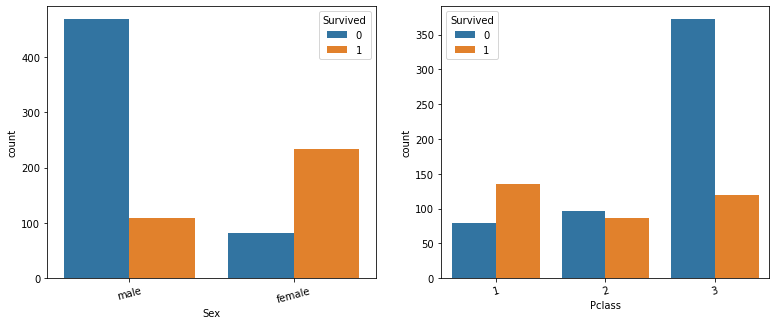

In [10]:
plt.figure(figsize = [20, 5])

#checking if gender has anything to do with survival
plt.subplot(1, 3, 1)
sb.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.xticks(rotation=15);

#checking if a passenger's class has anything to do with survival
plt.subplot(1, 3, 2)
sb.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.xticks(rotation=15);

In [11]:
print(train.SibSp.value_counts())
print(train.Parch.value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


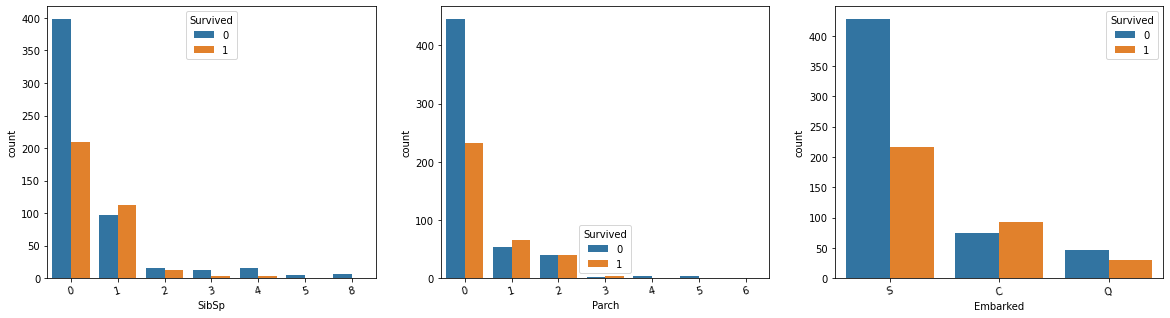

In [12]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
sb.countplot(data = train, x = 'SibSp', hue = 'Survived')
plt.xticks(rotation=15);

plt.subplot(1, 3, 2)
sb.countplot(data = train, x = 'Parch', hue = 'Survived')
plt.xticks(rotation=15);

plt.subplot(1, 3, 3)
sb.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.xticks(rotation=15);

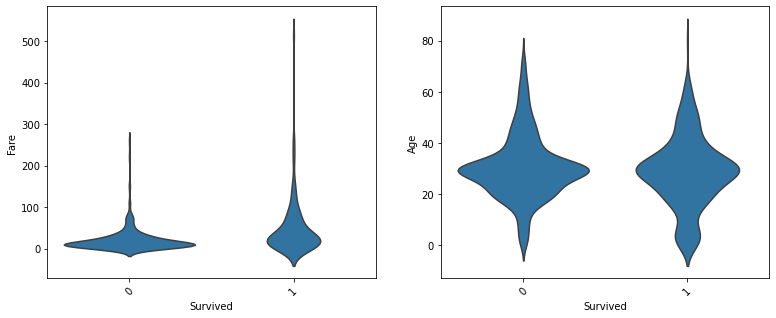

In [13]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]


plt.subplot(1, 3, 1)
sb.violinplot(data=train, x='Survived', y='Fare', inner = None,
              color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 3, 2)
sb.violinplot(data=train, x='Survived', y='Age', inner = None,
              color = base_color)
plt.xticks(rotation = 45);

In [14]:
sex = pd.get_dummies(train['Sex'])

In [15]:
train = pd.concat([train, sex]).fillna(0)
# train.head(2)

In [16]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0,0.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,0.0,0.0


In [17]:
train.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Embarked        object
female         float64
male           float64
dtype: object

In [18]:
train = train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [19]:
# converting data to whole numbers to better fit the models
train['PassengerId'] = train['PassengerId'].astype(int)
train['Survived'] = train['Survived'].astype(int)
train['Pclass'] = train['Pclass'].astype(int)
train['Age'] = train['Age'].astype(int)
train['SibSp'] = train['SibSp'].astype(int)
train['Parch'] = train['Parch'].astype(int)
train['Fare'] = train['Fare'].astype(int)
train['female'] = train['female'].astype(int)
train['male'] = train['male'].astype(int)


train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,1,0,3,22,1,0,7,0,0
1,2,1,1,38,1,0,71,0,0


In [20]:
# importing scikit modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('done')

done


In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'female', 'male'],
      dtype='object')

In [22]:
x = train.drop(['Survived'], axis = 1)
y = train['Survived']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
# Models

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()
kn = KNeighborsClassifier()

In [25]:
# model training function
def classification(x_train, x_test, y_train, y_test, model):    
    
    model.fit(x_train,y_train)
    preds = model.predict(x_test)

    print('Accuracy score => ', accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))

In [26]:
# RandomForestClassifier
classification(x_train, x_test, y_train, y_test, rf)

Accuracy score =>  0.8317757009345794
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       425
           1       0.63      0.44      0.52       110

    accuracy                           0.83       535
   macro avg       0.75      0.69      0.71       535
weighted avg       0.82      0.83      0.82       535



In [27]:
# DecisionTreeClassifier
classification(x_train, x_test, y_train, y_test, dt)

Accuracy score =>  0.8074766355140187
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       425
           1       0.54      0.47      0.50       110

    accuracy                           0.81       535
   macro avg       0.70      0.68      0.69       535
weighted avg       0.80      0.81      0.80       535



In [28]:
# LogisticRegression
classification(x_train, x_test, y_train, y_test, lr)

Accuracy score =>  0.822429906542056
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       425
           1       0.69      0.25      0.36       110

    accuracy                           0.82       535
   macro avg       0.76      0.61      0.63       535
weighted avg       0.80      0.82      0.79       535



In [29]:
# GradientBoostingClassifier
classification(x_train, x_test, y_train, y_test, gb)

Accuracy score =>  0.8355140186915888
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       425
           1       0.67      0.40      0.50       110

    accuracy                           0.84       535
   macro avg       0.76      0.67      0.70       535
weighted avg       0.82      0.84      0.82       535



In [30]:
# KNeighborsClassifier
classification(x_train, x_test, y_train, y_test, kn)

Accuracy score =>  0.8149532710280374
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       425
           1       0.59      0.34      0.43       110

    accuracy                           0.81       535
   macro avg       0.72      0.64      0.66       535
weighted avg       0.79      0.81      0.79       535



In [31]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [32]:
# seraching for the best parameters to improve model's accuracy
rfc = RandomForestClassifier()
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf = GridSearchCV(rfc, forest_params, cv = 5, scoring='accuracy')
clf.fit(x_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 12, 'max_features': 2}
0.8612851405622489


In [33]:
test = pd.read_csv('test.csv')

In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
sex = pd.get_dummies(test['Sex'])
test = pd.concat([test, sex]).fillna(0)

In [36]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,0,Q,0.0,0.0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,0,S,0.0,0.0


In [37]:
test.dtypes

PassengerId    float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
female         float64
male           float64
dtype: object

In [38]:
test = test.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [39]:
test.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male
0,892.0,3.0,34.5,0.0,0.0,7.8292,0.0,0.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0


In [40]:
test['PassengerId'] = test['PassengerId'].astype(int)
test['Pclass'] = test['Pclass'].astype(int)
test['Age'] = test['Age'].astype(int)
test['SibSp'] = test['SibSp'].astype(int)
test['Parch'] = test['Parch'].astype(int)
test['Fare'] = test['Fare'].astype(int)
test['female'] = test['female'].astype(int)
test['male'] = test['male'].astype(int)

In [41]:
test_predictions = clf.predict(test)

In [42]:
test_predictions

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [54]:
predicts = {'PassengerId': test.PassengerId, 'Survived': test_predictions}
submission = pd.DataFrame(data=predicts)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,0,0
414,0,0
415,0,0
416,0,0


In [68]:
submission.shape

(836, 2)

In [69]:
final_preds = submission.drop_duplicates()
final_preds.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [93]:
final_preds['PassengerId'].nunique()

419

In [95]:
df = final_data.copy()
df = df.drop(labels=418, axis=0)
df.shape

(418, 2)

In [98]:
df.to_csv('final_submission.csv', index=False)
final_submission = pd.read_csv('final_submission.csv')
final_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [99]:
final_submission.shape

(418, 2)